In [13]:
import numpy as np
import torch
import torchvision
import matplotlib.pyplot as plt
from time import time
from torchvision import datasets,transforms
from torch import nn,optim

In [14]:
transform = transforms.Compose([
    transforms.ToTensor(),transforms.Normalize(0.5,0.5)
])

In [15]:
trainset = datasets.MNIST('dataset',download=True,train=True,transform=transform)
valset = datasets.MNIST('dataset',download=True,train=False,transform=transform)

trainloader = torch.utils.data.DataLoader(trainset,batch_size=64,shuffle=True)
valloder = torch.utils.data.DataLoader(valset,batch_size=64,shuffle=True)


In [16]:
dataiter = iter (trainloader)
images,labels = dataiter.__next__()

images.shape

torch.Size([64, 1, 28, 28])

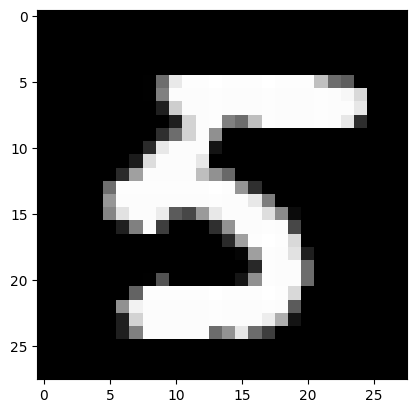

In [17]:
plt.imshow(images[0].numpy().squeeze(),cmap='gray')

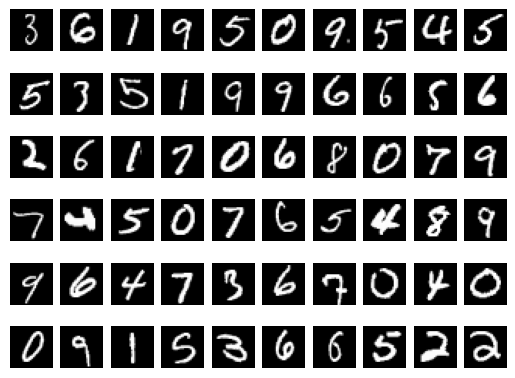

In [18]:
fig = plt.figure()
num_of_imgs = 60

for index in range(1,num_of_imgs+1):
    plt.subplot(6,10,index)
    plt.axis('off')
    plt.imshow(images[index].numpy().squeeze(),cmap='gray')

In [19]:
input_size = 784
hidden_sizes = [128,64]
output_size = 10

model = nn.Sequential(
    nn.Linear(input_size,hidden_sizes[0]),
    nn.ReLU(),
    nn.Linear(hidden_sizes[0],hidden_sizes[1]),
    nn.ReLU(),
    nn.Linear(hidden_sizes[1],output_size),
    nn.LogSoftmax(dim=1)
)

In [20]:
criterion = nn.NLLLoss()
images,labels = next(iter(trainloader))
images = images.view(images.shape[0],-1)

logps = model(images)
loss = criterion(logps,labels)

In [21]:
print('Before backward pass: \n', model[0].weight.grad)
loss.backward()
print('After backward pass: \n', model[0].weight.grad)

Before backward pass: 
 None
After backward pass: 
 tensor([[ 0.0005,  0.0005,  0.0005,  ...,  0.0005,  0.0005,  0.0005],
        [-0.0015, -0.0015, -0.0015,  ..., -0.0015, -0.0015, -0.0015],
        [-0.0027, -0.0027, -0.0027,  ..., -0.0027, -0.0027, -0.0027],
        ...,
        [ 0.0019,  0.0019,  0.0019,  ...,  0.0019,  0.0019,  0.0019],
        [ 0.0014,  0.0014,  0.0014,  ...,  0.0014,  0.0014,  0.0014],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000]])


In [22]:
optimizer = optim.SGD (model.parameters(),lr = 0.01,momentum=0.9)
time0 = time()
epochs = 15

for epoch in range(epochs):
    running_loss = 0.0
    
    for batch_images, batch_labels in trainloader:
        optimizer.zero_grad()  # Zero out gradients at the start of each batch
        
        # Forward pass
        batch_images = batch_images.view(batch_images.shape[0], -1)
        outputs = model(batch_images)
        loss = criterion(outputs, batch_labels)
        
        # Backward pass
        loss.backward()
        
        # Update weights
        optimizer.step()
        
        running_loss += loss.item()
    
    # Print or log the loss for this epoch
    print(f"Epoch {epoch+1}/{epochs}, Loss: {running_loss/len(trainloader)}")


Epoch 1/15, Loss: 0.4383639721458019
Epoch 2/15, Loss: 0.1779952996265469
Epoch 3/15, Loss: 0.12713425769718853
Epoch 4/15, Loss: 0.10434381105204317
Epoch 5/15, Loss: 0.08920077383885586
Epoch 6/15, Loss: 0.07708341733831515
Epoch 7/15, Loss: 0.06862201491894046
Epoch 8/15, Loss: 0.06015365214215151
Epoch 9/15, Loss: 0.05280763724310471
Epoch 10/15, Loss: 0.04833107980711362
Epoch 11/15, Loss: 0.043624432463479884
Epoch 12/15, Loss: 0.039468395946942555
Epoch 13/15, Loss: 0.03606859768598354
Epoch 14/15, Loss: 0.03310045172123542
Epoch 15/15, Loss: 0.028913676853913235


Class Probapility of a image

Predicted Digit = 6


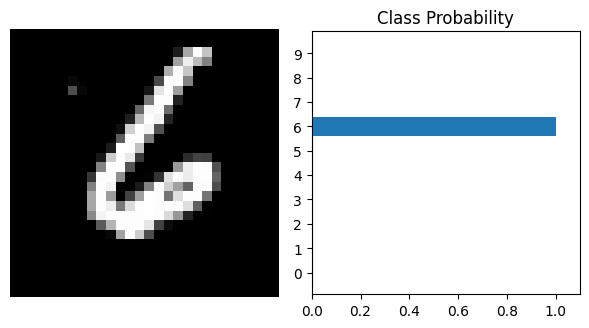

In [31]:
def view_classify(img, ps):
    ''' Function for viewing an image and it's predicted classes.
    '''
    ps = ps.data.numpy().squeeze()

    fig, (ax1, ax2) = plt.subplots(figsize=(6,9), ncols=2)
    ax1.imshow(img.resize_(1, 28, 28).numpy().squeeze(),cmap='gray')
    ax1.axis('off')
    ax2.barh(np.arange(10), ps)
    ax2.set_aspect(0.1)
    ax2.set_yticks(np.arange(10))
    ax2.set_yticklabels(np.arange(10))
    ax2.set_title('Class Probability')
    ax2.set_xlim(0, 1.1)
    plt.tight_layout()


images, labels = next(iter(valloder))

img = images[0].view(1, 784)
with torch.no_grad():
    logps = model(img)

ps = torch.exp(logps)
probab = list(ps.numpy()[0])
print("Predicted Digit =", probab.index(max(probab)))
view_classify(img.view(1, 28, 28), ps)



validation set accuracy

In [24]:
correct_count, all_count = 0, 0
for images,labels in valloder:
  for i in range(len(labels)):
    img = images[i].view(1, 784)
    with torch.no_grad():
        logps = model(img)

    
    ps = torch.exp(logps)
    probab = list(ps.numpy()[0])
    pred_label = probab.index(max(probab))
    true_label = labels.numpy()[i]
    if(true_label == pred_label):
      correct_count += 1
    all_count += 1

print("Number Of Images Tested =", all_count)
print("\nModel Accuracy =", (correct_count/all_count))

Number Of Images Tested = 10000

Model Accuracy = 0.9769


In [25]:
import torch

# Load the saved model
model = torch.load('./my_mnist_model.pt')
